__Inputs__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


__1. Begin by reading the dataset music_spotify.csv. Describe its structure, produce several examples of its entries. Valence: A measure from 0 to 1 describing the musical positiveness conveyed by the track. The closer the value is to 1, the more positive the track is. Explanation of variables can be found on Spotify web page.__


In [ ]:
music_df = pd.read_csv('music_spotify.csv')

In [ ]:
music_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
print(music_df.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

__2. Create density plots of the variables acousticness, danceability, duration ms, energy, and instrumentalness, each versus the response variable target. An outline of the code is shown below:
library(ggplot2) # ggplot2 library has many tricks for nice plotting
library(cowplot) # in this library there is a plot grid function, among others
music$target=as.factor(music$target) # Here we change the type of target from numerical to factor.
p1 = ggplot(data=music,aes(x=acousticness,fill=target))
             + geom density() + labs(title="Acousticness by target")
#include code for plots p2 - p5
plot_grid(p1,p2,p3,p4,p5,ncol=3)__

Text(0.5, 1.0, 'Acousticness by Target')

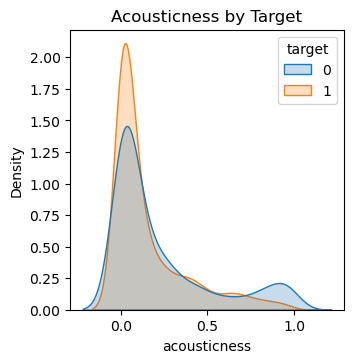

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.kdeplot(data=music_df, x='acousticness', hue='target', fill=True)
plt.title('Acousticness by Target')

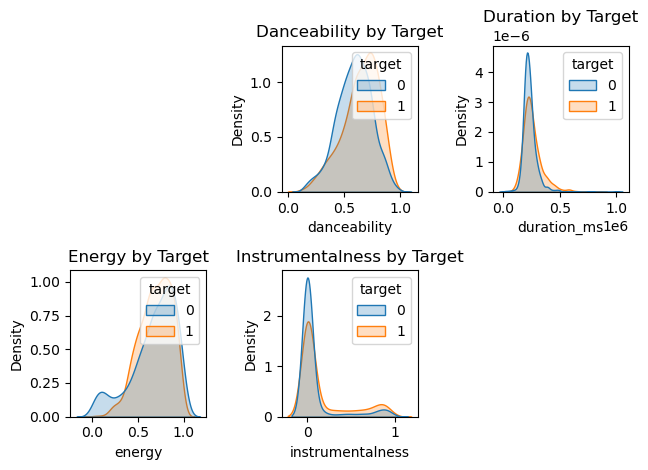

In [ ]:
plt.subplot(2, 3, 2)
sns.kdeplot(data=music_df, x='danceability', hue='target', fill=True)
plt.title('Danceability by Target')

plt.subplot(2, 3, 3)
sns.kdeplot(data=music_df, x='duration_ms', hue='target', fill=True)
plt.title('Duration by Target')

plt.subplot(2, 3, 4)
sns.kdeplot(data=music_df, x='energy', hue='target', fill=True)
plt.title('Energy by Target')

plt.subplot(2, 3, 5)
sns.kdeplot(data=music_df, x='instrumentalness', hue='target', fill=True)
plt.title('Instrumentalness by Target')

plt.tight_layout()
plt.show()


__3. Create density plots of the variables liveness, loudness, speechiness, tempo, and valence, each versus the response variable target.__

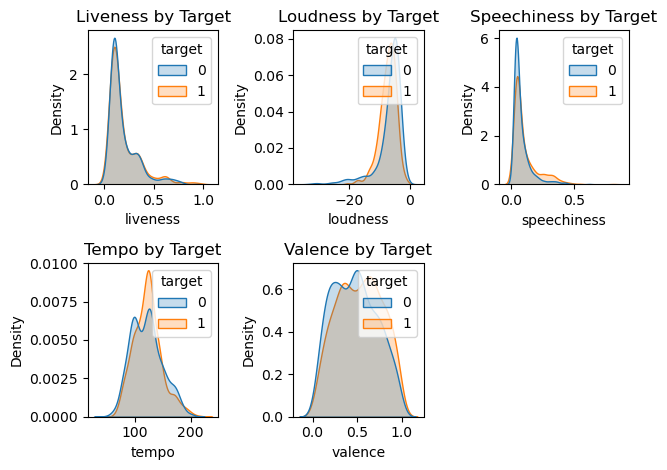

In [ ]:
plt.subplot(2, 3, 1)
sns.kdeplot(data=music_df, x='liveness', hue='target', fill=True)
plt.title('Liveness by Target')

plt.subplot(2, 3, 2)
sns.kdeplot(data=music_df, x='loudness', hue='target', fill=True)
plt.title('Loudness by Target')

plt.subplot(2, 3, 3)
sns.kdeplot(data=music_df, x='speechiness', hue='target', fill=True)
plt.title('Speechiness by Target')

plt.subplot(2, 3, 4)
sns.kdeplot(data=music_df, x='tempo', hue='target', fill=True)
plt.title('Tempo by Target')

plt.subplot(2, 3, 5)
sns.kdeplot(data=music_df, x='valence', hue='target', fill=True)
plt.title('Valence by Target')

plt.tight_layout()
plt.show()


__4. Use bar graphs to display the distributions of the remaining variables, since they are best understood as describing categories rather than numerical data. Create bar graphs for the variables key, mode, and time signature. As before, use plot_grid() to neatly organize the plots into two columns.
There are many ways to plot bar graphs. Below is an example of one way to plot a stacked bar graph.
p1 = ggplot(data=music,aes(x=key)) +
            geom_bar(aes(fill=target)) + labs(title="Like vs.Key")__

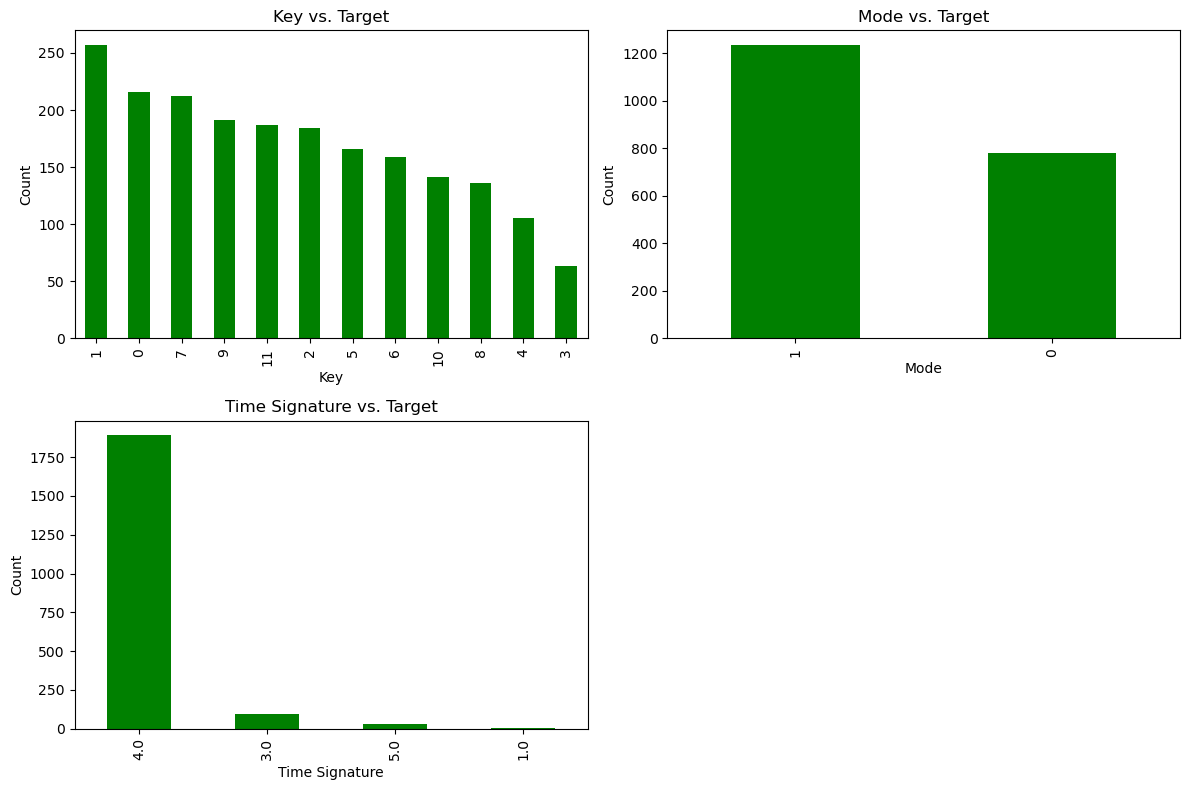

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

music_df['target'] = music_df['target'].astype('category')

key_counts = music_df['key'].value_counts()
key_counts.plot(kind='bar', ax=axes[0, 0], color=[['blue', 'green'][i] for i in music_df['target'].cat.codes])
axes[0, 0].set_title('Key vs. Target')
axes[0, 0].set_xlabel('Key')
axes[0, 0].set_ylabel('Count')

mode_counts = music_df['mode'].value_counts()
mode_counts.plot(kind='bar', ax=axes[0, 1], color=[['blue', 'green'][i] for i in music_df['target'].cat.codes])
axes[0, 1].set_title('Mode vs. Target')
axes[0, 1].set_xlabel('Mode')
axes[0, 1].set_ylabel('Count')

time_signature_counts = music_df['time_signature'].value_counts()
time_signature_counts.plot(kind='bar', ax=axes[1, 0], color=[['blue', 'green'][i] for i in music_df['target'].cat.codes])
axes[1, 0].set_title('Time Signature vs. Target')
axes[1, 0].set_xlabel('Time Signature')
axes[1, 0].set_ylabel('Count')

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


__6. Split the data into training and testing subsets (splitting should be done based on target values). Fit logistic model to all variables except X, song title and artist. Using 0.5 probability threshold, report confusion table, accuracy for each class, as well as overall accuracy. Write down the resulting logistic regression equation (i.e. equation where all unknown coefficients wi
) are exchanged with the values returned by training function.__

In [ ]:
X = music_df.drop(['target', 'song_title', 'artist'], axis=1)
y = music_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy_per_class = accuracy_score(y_test, y_pred, normalize=False)
overall_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy for each class:")
print("Class 0 (Dislike):", conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]))
print("Class 1 (Like):", conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]))

print("\nOverall Accuracy:", overall_accuracy)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

equation = f"y = 1 / (1 + exp(-({intercept:.4f} + "

for i, coef in enumerate(coefficients):
    equation += f"{coef:.4f} * {X.columns[i]} + "

equation = equation[:-2] + ")))"

print("\nLogistic Regression Equation:")
print(equation)


Confusion Matrix:
[[196  10]
 [ 11 187]]

Accuracy for each class:
Class 0 (Dislike): 0.9514563106796117
Class 1 (Like): 0.9444444444444444

Overall Accuracy: 0.948019801980198

Logistic Regression Equation:
y = 1 / (1 + exp(-(0.0004 + -0.0107 * Unnamed: 0 + -0.0000 * acousticness + 0.0003 * danceability + 0.0000 * duration_ms + 0.0004 * energy + 0.0000 * instrumentalness + 0.0019 * key + 0.0001 * liveness + -0.0015 * loudness + 0.0002 * mode + 0.0001 * speechiness + 0.0513 * tempo + 0.0016 * time_signature + 0.0003 * valence )))


__7. Select three probability threshold values (e.g. 0.3, 0.4, 0.5) and investigate accuracy results for each of these threshold values. Discuss, which is better: to make more mistakes by predicting if the song will be liked, or making more mistakes by predicting if the song will be disliked?__

In [ ]:
thresholds = [0.3, 0.4, 0.5]

for threshold in thresholds:
    y_pred_thresholded = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thresholded)
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_thresholded))
    print("Accuracy for each class:")
    print("Class 0 (Dislike):", confusion_matrix(y_test, y_pred_thresholded)[0, 0] / (confusion_matrix(y_test, y_pred_thresholded)[0, 0] + confusion_matrix(y_test, y_pred_thresholded)[0, 1]))
    print("Class 1 (Like):", confusion_matrix(y_test, y_pred_thresholded)[1, 1] / (confusion_matrix(y_test, y_pred_thresholded)[1, 0] + confusion_matrix(y_test, y_pred_thresholded)[1, 1]))



Threshold: 0.3
Accuracy: 0.9579207920792079
Confusion Matrix:
[[194  12]
 [  5 193]]
Accuracy for each class:
Class 0 (Dislike): 0.941747572815534
Class 1 (Like): 0.9747474747474747

Threshold: 0.4
Accuracy: 0.9579207920792079
Confusion Matrix:
[[195  11]
 [  6 192]]
Accuracy for each class:
Class 0 (Dislike): 0.9466019417475728
Class 1 (Like): 0.9696969696969697

Threshold: 0.5
Accuracy: 0.948019801980198
Confusion Matrix:
[[196  10]
 [ 11 187]]
Accuracy for each class:
Class 0 (Dislike): 0.9514563106796117
Class 1 (Like): 0.9444444444444444


__8. In (5) you discussed how well different variables might differentiate between two classes. Some variables seemed more useful than others. Perhaps you could, based on discussion in (5) reduce the number of parameters and still have the same (or even higher) accuracy? Your answer must be substantiated by a proof, meaning, that you have to train new model without those features, that you consider unimportant.__

In [ ]:
selected_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence', 'key']

X_selected = music_df[selected_features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train_selected)

y_pred_selected = model_selected.predict(X_test_selected)

conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)
accuracy_per_class_selected = accuracy_score(y_test_selected, y_pred_selected, normalize=False)
overall_accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)

print("Confusion Matrix (Selected Features):")
print(conf_matrix_selected)

print("\nAccuracy for each class (Selected Features):")
print("Class 0 (Dislike):", conf_matrix_selected[0, 0] / (conf_matrix_selected[0, 0] + conf_matrix_selected[0, 1]))
print("Class 1 (Like):", conf_matrix_selected[1, 1] / (conf_matrix_selected[1, 0] + conf_matrix_selected[1, 1]))

print("\nOverall Accuracy (Selected Features):", overall_accuracy_selected)
print("\nOverall Accuracy (Original Model):", overall_accuracy)


Confusion Matrix (Selected Features):
[[135  71]
 [ 69 129]]

Accuracy for each class (Selected Features):
Class 0 (Dislike): 0.6553398058252428
Class 1 (Like): 0.6515151515151515

Overall Accuracy (Selected Features): 0.6534653465346535

Overall Accuracy (Original Model): 0.948019801980198


In [ ]:
def apply_transformations(df):
    transformed_df = df.copy()
    for feature in selected_features:
        transformed_df[f"log_{feature}"] = np.log1p(df[feature])

        transformed_df[f"sqrt_{feature}"] = np.sqrt(df[feature])

        transformed_df[f"square_{feature}"] = df[feature] ** 2

    transformed_df.dropna(inplace=True)

    return transformed_df

transformed_music = apply_transformations(music_df)

for column in transformed_music.columns:
    X_transformed = transformed_music[[column]]
    X_test_transformed = apply_transformations(X_test_selected)[[column]] 

    model_transformed = LogisticRegression()
    model_transformed.fit(X_transformed, y_train_selected.loc[X_transformed.index]) 

    print(f"\nTransformed Feature: {column}")

    for threshold in [0.3, 0.5, 0.7]:
        y_pred_transformed = (model_transformed.predict_proba(X_test_transformed)[:, 1] > threshold).astype(int)

        overall_accuracy_transformed = accuracy_score(y_test_selected, y_pred_transformed)
        accuracy_class_0_transformed = confusion_matrix(y_test_selected, y_pred_transformed)[0, 0] / (confusion_matrix(y_test_selected, y_pred_transformed)[0, 0] + confusion_matrix(y_test_selected, y_pred_transformed)[0, 1])
        accuracy_class_1_transformed = confusion_matrix(y_test_selected, y_pred_transformed)[1, 1] / (confusion_matrix(y_test_selected, y_pred_transformed)[1, 0] + confusion_matrix(y_test_selected, y_pred_transformed)[1, 1])

        print(f"\nThreshold: {threshold}")
        print("Overall Accuracy:", overall_accuracy_transformed)
        print("Accuracy for Class 0 (Dislike):", accuracy_class_0_transformed)
        print("Accuracy for Class 1 (Like):", accuracy_class_1_transformed)
